<a href="https://colab.research.google.com/github/paulopestanajunior/case_airbnb/blob/main/airbnb_NLP_analise_de_sentimentos_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
rw = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/data/reviews.csv.gz')
li = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/data/listings.csv.gz')




In [7]:
rw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r<b...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [8]:
rw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356118 entries, 0 to 356117
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     356118 non-null  int64 
 1   id             356118 non-null  int64 
 2   date           356118 non-null  object
 3   reviewer_id    356118 non-null  int64 
 4   reviewer_name  356118 non-null  object
 5   comments       355995 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.3+ MB


In [9]:
rw.nunique()


listing_id        15588
id               356118
date               3820
reviewer_id      297839
reviewer_name     44543
comments         342559
dtype: int64

In [10]:
rw.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         123
dtype: int64

In [11]:
li.head(4)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.69
3,35636,https://www.airbnb.com/rooms/35636,20211224070558,2021-12-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.82


In [12]:
li.shape

(24549, 74)

In [13]:
li.review_scores_rating.describe()

count    15588.000000
mean         4.620983
std          0.871163
min          0.000000
25%          4.670000
50%          4.880000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [14]:
li.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24549 non-null  int64  
 1   listing_url                                   24549 non-null  object 
 2   scrape_id                                     24549 non-null  int64  
 3   last_scraped                                  24549 non-null  object 
 4   name                                          24528 non-null  object 
 5   description                                   23336 non-null  object 
 6   neighborhood_overview                         13212 non-null  object 
 7   picture_url                                   24549 non-null  object 
 8   host_id                                       24549 non-null  int64  
 9   host_url                                      24549 non-null 

In [15]:
df = pd.merge(rw, li[['neighbourhood_cleansed', 'host_id', 'latitude', 'host_name',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'neighbourhood_cleansed':'neighbourhood'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [16]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,host_id,latitude,host_name,longitude,number_of_reviews,property_type
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...,Copacabana,68997,-22.96599,Matthias,-43.1794,267,Entire condominium (condo)
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...,Copacabana,68997,-22.96599,Matthias,-43.1794,267,Entire condominium (condo)
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...,Copacabana,68997,-22.96599,Matthias,-43.1794,267,Entire condominium (condo)


In [17]:
print("O dataset tem {} linhas e {} colunas.".format(*df.shape))

O dataset tem 356118 linhas e 13 colunas.


In [18]:
properties_per_host = pd.DataFrame(df.groupby('host_id',)['listing_id'].nunique())

# sort unique values descending and show the Top10
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(10)



,listing_id
host_id,
6000862,84
371026651,74
74463624,55
1982737,51
91654021,46
13580277,41
532498,33
47584281,32
12909867,28


In [19]:
top1_host = df.host_id == 6000862
df[top1_host].neighbourhood.value_counts()

pd.DataFrame(df[top1_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Barra da Tijuca,5
Botafogo,3
Copacabana,41
Humaitá,1
Ipanema,28
Jacarepaguá,1
Leblon,2
Recreio dos Bandeirantes,2
Vidigal,1


In [20]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire rental unit,83
Entire residential home,1


In [21]:
top2_host = df.host_id == 371026651
df[top2_host].neighbourhood.value_counts()

pd.DataFrame(df[top2_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Barra da Tijuca,20
Botafogo,1
Copacabana,33
Flamengo,1
Ipanema,11
Lagoa,2
Leblon,6


In [22]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire rental unit,83
Entire residential home,1


In [23]:
top3_host = df.host_id == 74463624
df[top3_host].neighbourhood.value_counts()

pd.DataFrame(df[top3_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Copacabana,51
Ipanema,3
Leme,1


In [24]:
pd.DataFrame(df[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire condominium (condo),2
Entire rental unit,53


In [25]:
df.isna().sum()


listing_id             0
id                     0
date                   0
reviewer_id            0
reviewer_name          0
comments             123
neighbourhood          0
host_id                0
latitude               0
host_name            143
longitude              0
number_of_reviews      0
property_type          0
dtype: int64

In [26]:
df.isna().sum()


listing_id             0
id                     0
date                   0
reviewer_id            0
reviewer_name          0
comments             123
neighbourhood          0
host_id                0
latitude               0
host_name            143
longitude              0
number_of_reviews      0
property_type          0
dtype: int64

In [27]:
df.dropna(inplace=True)
df.isna().sum()

listing_id           0
id                   0
date                 0
reviewer_id          0
reviewer_name        0
comments             0
neighbourhood        0
host_id              0
latitude             0
host_name            0
longitude            0
number_of_reviews    0
property_type        0
dtype: int64

In [28]:
df.shape

(355852, 13)

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

        

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
analyzer = SentimentIntensityAnalyzer()


In [31]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [32]:
print_sentiment_scores("O dia é muito bom.")


O dia é muito bom.---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [33]:
print_sentiment_scores("The book is good.")
print_sentiment_scores("The book is GOOD!")
print_sentiment_scores("the book is very GOOD!!")
print_sentiment_scores("This book is really GOOD! But the price is horrible.")
print_sentiment_scores("The book is not good.")
print_sentiment_scores("The book is dirty.")

The book is good.----------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
The book is GOOD!----------------------- {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6027}
the book is very GOOD!!----------------- {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.6715}
This book is really GOOD! But the price is horrible. {'neg': 0.223, 'neu': 0.509, 'pos': 0.268, 'compound': 0.1823}
The book is not good.------------------- {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}
The book is dirty.---------------------- {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}


In [34]:
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [35]:
negative_score("This book is really GOOD! But the price is horrible.")

0.223

In [36]:
neutral_score("This book is really GOOD! But the price is horrible.")

0.509

In [37]:
positive_score("This book is really GOOD! But the price is horrible.")


0.268

In [38]:
compound_score("This book is really GOOD! But the price is horrible.")

0.1823

In [39]:
%%time

df['sentiment_neg'] = df['comments'].apply(negative_score)
df['sentiment_neu'] = df['comments'].apply(neutral_score)
df['sentiment_pos'] = df['comments'].apply(positive_score)
df['sentiment_compound'] = df['comments'].apply(compound_score)

CPU times: user 10min 9s, sys: 2.46 s, total: 10min 12s
Wall time: 10min 10s


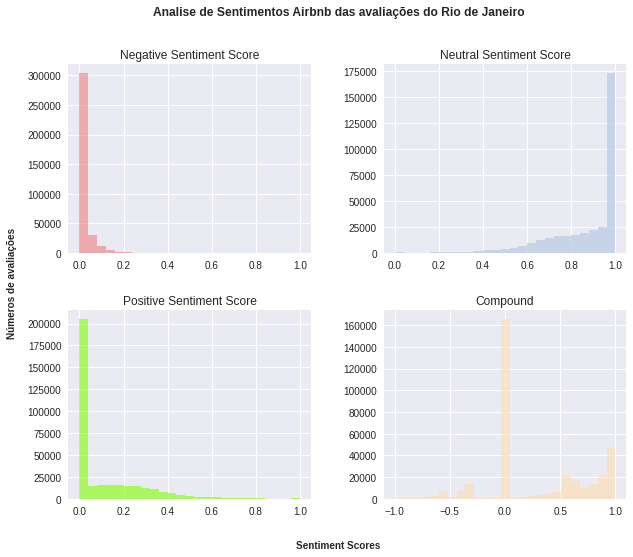

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))


df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')


fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Números de avaliações', fontweight='bold', va='center', rotation='vertical')


plt.suptitle('Analise de Sentimentos Airbnb das avaliações do Rio de Janeiro', fontsize=12, fontweight='bold');

In [41]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    355852.000000
mean          0.268367
std           0.458089
min          -0.998700
5%           -0.418400
10%          -0.296000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.340000
70%           0.624900
80%           0.831600
90%           0.945700
max           0.999600
Name: sentiment_compound, dtype: float64

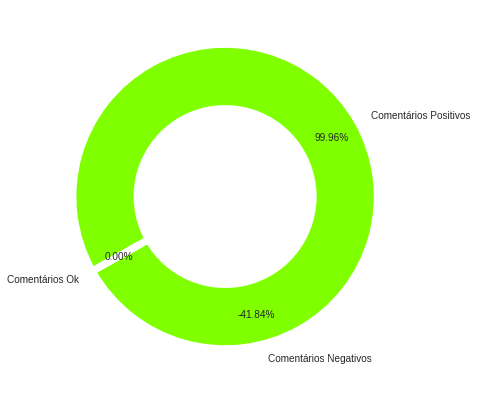

In [42]:
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Comentários Negativos', 'Comentários Ok','Comentários Positivos']
size = [neg, mid, pos]


plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

my_circle = plt.Circle((0,0), 0.6, color='white')


fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [43]:
df_pos = df.loc[df.sentiment_compound >= 0.95]


pos_comments = df_pos['comments'].tolist()

In [44]:
df_neg = df.loc[df.sentiment_compound < 0.0]


neg_comments = df_neg['comments'].tolist()

In [45]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

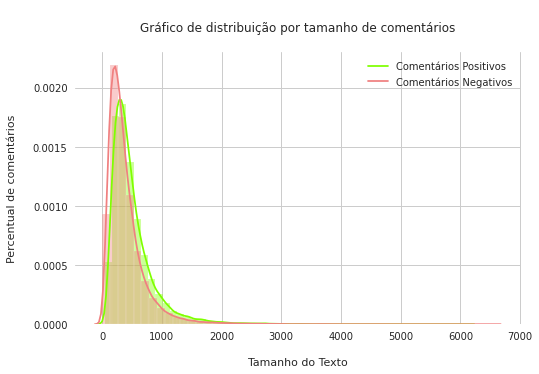

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nGráfico de distribuição por tamanho de comentários\n')
plt.legend(['Comentários Positivos', 'Comentários Negativos'])
plt.xlabel('\nTamanho do Texto')
plt.ylabel('Percentual de comentários\n');

In [47]:
pos_comments[10:15]

["This was our first stop and first time in Brazil and it was a blast to begin in Rio. The flat is located close to the beach, many restaurants, and is in a gentle but lively neighborhood. Max is a gem of a host he directed us to many places with many ideas sent via email, we truly appreciate his laid back vibe, professionalism, and kindness. The flat is very clean and we had everything we could need after spending days on the beach and nights out and about. We hope to pass through on another occasion and we'll be happy to call Max. Muito Obrigada!!",
 "Max is awesome, His place is great and in an amazing location in Copacabana. It's near the beach, near the bus lines and subway. This trip has been great and Max made it really easy to come and go as we please. We'll definitely be back to Max's the next time we're in Rio.",
 'The apartment was amazing. It has just been renovated and it is in a very good location. It was clean, cozy and there were clean towels and sheets. Max was a great

In [48]:
neg_comments[10:15]

['El departamento es fiel al su anuncio, nos sentimos muy cómodos en su living, pero en especial en su terraza donde compartimos desayunos y cenas. Su ubicación es excelente, y al estar en una calle vehicular restringida, no tiene ruidos, espero volver....  ',
 'Lugar bem localizado, pertinho de tudo: praia, supermercado, Farmacia. Transporte público bem a mão. Para nós que estávamos em 3 pessoas saia mais barato andar de táxi, sempre pelos app!! A título de Sugestões: por banquetas na mesa da sala, para gente não sentar com a roupa Úmida nas poltronas acabamos ficando de pé até poder entrar para o banho, já q estávamos em 3 pessoas. Senti falta Tb de forma de forno, proteção nas bordas da banheira para não machucar as pernas ao entrar, tapete antiderrapante no banheiro dentro e fora da banheira e melhorar a Wi-Fi. Mas são apenas melhorias nada q prejudique a qualidade e o conforto da estadia! Certamente ficaríamos no seu ap novamente! ',
 'A estadia no apartamento de Matthias foi ótim

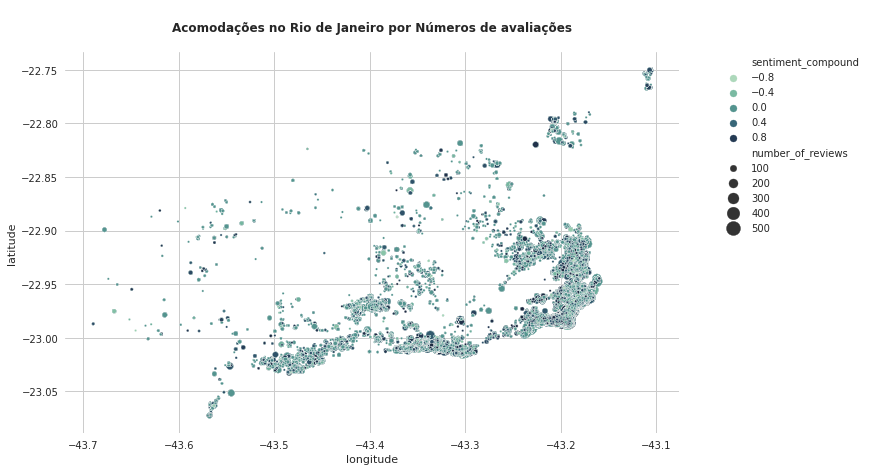

In [49]:
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x="longitude", y="latitude", size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAcomodações no Rio de Janeiro por Números de avaliações\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [50]:
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [51]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

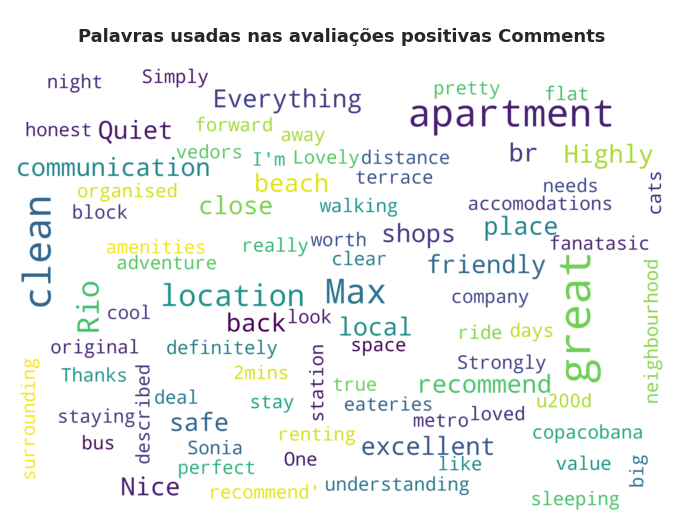

In [52]:

wordcloud = WordCloud(max_font_size=200, max_words=200, background_color='white',
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPalavras usadas nas avaliações positivas')

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

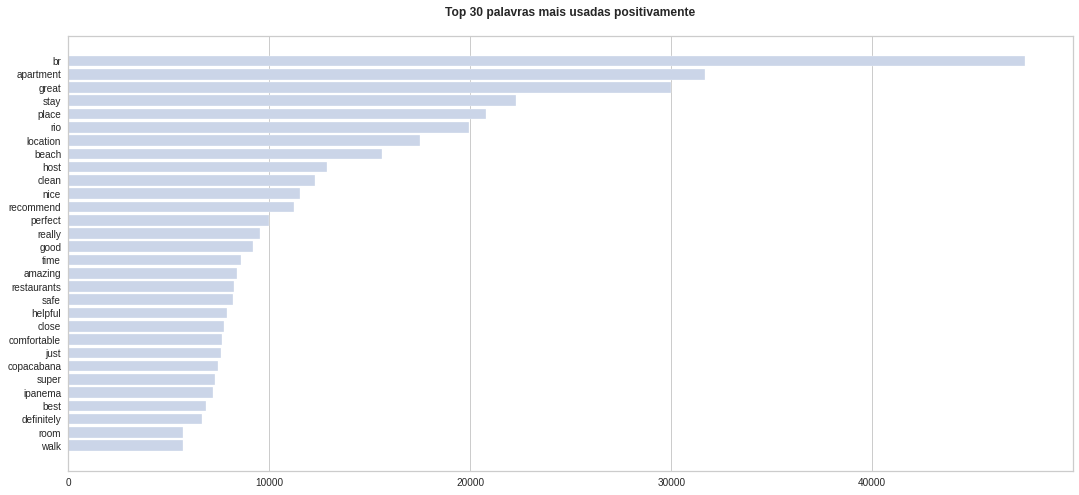

In [54]:
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()


set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('Top 30 palavras mais usadas positivamente\n', fontweight='bold')


visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [55]:
from nltk.stem.wordnet import WordNetLemmatizer


In [56]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [57]:
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [58]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 

In [59]:
import gensim

In [60]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [61]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.043*"e" + 0.028*"de" + 0.024*"super" + 0.017*"é"')
(1, '0.015*"apartment" + 0.008*"beach" + 0.007*"room" + 0.007*"great"')
(2, '0.028*"great" + 0.024*"place" + 0.023*"apartment" + 0.021*"stay"')


In [62]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.018*"u" + 0.016*"rio" + 0.015*"place" + 0.010*"stay"')
(1, '0.021*"appartment" + 0.014*"de" + 0.011*"br" + 0.011*"sergio"')
(2, '0.038*"great" + 0.032*"apartment" + 0.026*"place" + 0.025*"stay"')
(3, '0.021*"apartment" + 0.012*"beach" + 0.010*"great" + 0.009*"kitchen"')
(4, '0.049*"e" + 0.028*"de" + 0.027*"super" + 0.020*"é"')


In [63]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [64]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.108*"br" + 0.039*"brthe" + 0.026*"english" + 0.017*"speak"')
(1, '0.049*"great" + 0.037*"apartment" + 0.031*"place" + 0.030*"location"')
(2, '0.027*"rio" + 0.016*"stay" + 0.015*"host" + 0.014*"airbnb"')
(3, '0.054*"e" + 0.032*"de" + 0.030*"super" + 0.022*"é"')
(4, '0.014*"airbnb" + 0.013*"hidden" + 0.010*"fernando" + 0.010*"renata"')
(5, '0.031*"maria" + 0.017*"de" + 0.017*"le" + 0.015*"et"')
(6, '0.016*"room" + 0.015*"kitchen" + 0.013*"bed" + 0.011*"good"')
(7, '0.035*"view" + 0.017*"house" + 0.017*"beautiful" + 0.015*"place"')
(8, '0.027*"place" + 0.026*"u" + 0.019*"rio" + 0.018*"stay"')
(9, '0.031*"apartment" + 0.023*"beach" + 0.018*"u" + 0.013*"restaurant"')


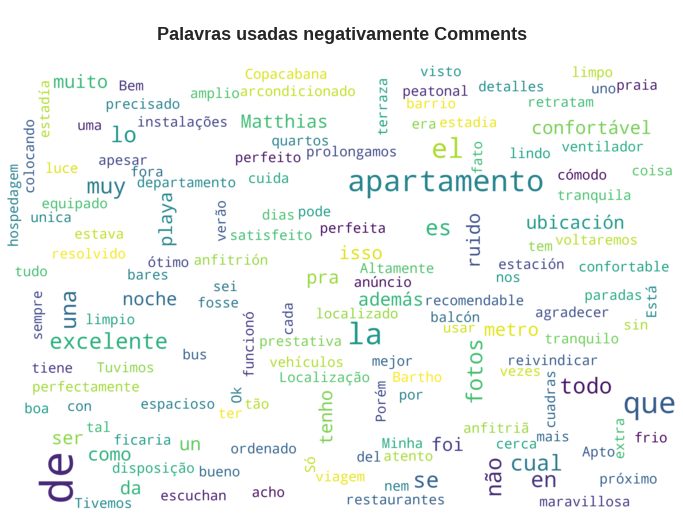

In [65]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nPalavras usadas negativamente')

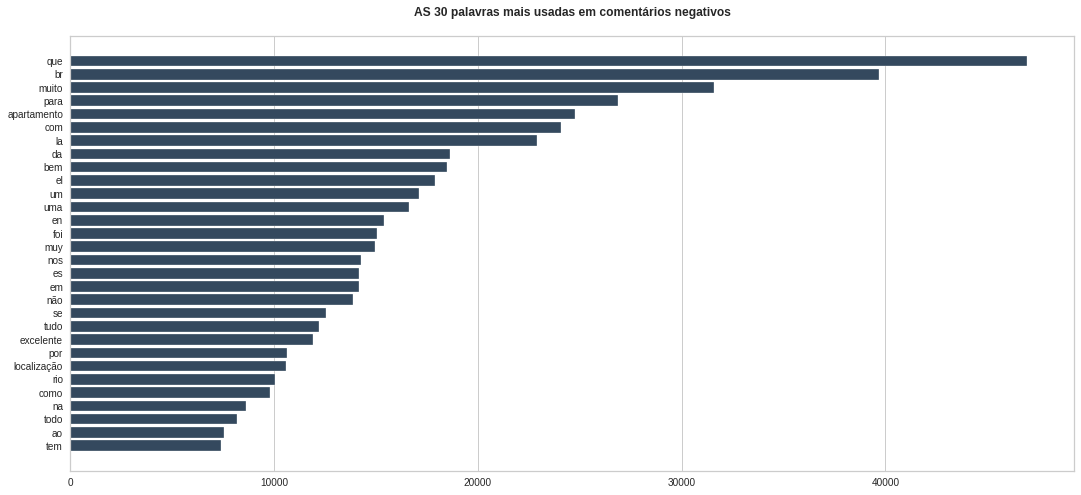

In [66]:
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()


set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('AS 30 palavras mais usadas em comentários negativos\n', fontweight='bold')

visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [67]:
doc_clean = [clean(comment).split() for comment in neg_comments]

In [68]:
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]


In [69]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [70]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"de" + 0.012*"et" + 0.010*"und" + 0.010*"le"')
(1, '0.041*"la" + 0.039*"de" + 0.027*"el" + 0.023*"muy"')
(2, '0.050*"e" + 0.030*"de" + 0.022*"que" + 0.021*"é"')


In [71]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [72]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.028*"und" + 0.021*"die" + 0.018*"ist" + 0.014*"sehr"')
(1, '0.042*"la" + 0.040*"de" + 0.028*"el" + 0.024*"muy"')
(2, '0.040*"de" + 0.029*"et" + 0.023*"le" + 0.020*"à"')
(3, '0.036*"não" + 0.016*"que" + 0.007*"estava" + 0.006*"ma"')
(4, '0.056*"e" + 0.033*"de" + 0.024*"é" + 0.023*"que"')


In [73]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [74]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.043*"que" + 0.038*"não" + 0.016*"estava" + 0.015*"e"')
(1, '0.014*"apartment" + 0.010*"host" + 0.009*"place" + 0.008*"stay"')
(2, '0.014*"recreio" + 0.009*"renata" + 0.008*"hospedo" + 0.007*"renato"')
(3, '0.065*"e" + 0.035*"muito" + 0.026*"é" + 0.022*"de"')
(4, '0.046*"e" + 0.045*"de" + 0.026*"que" + 0.024*"é"')
(5, '0.008*"fico" + 0.008*"causa" + 0.007*"relaxar" + 0.005*"di"')
(6, '0.007*"br" + 0.006*"casa" + 0.005*"estadias" + 0.005*"teresa"')
(7, '0.037*"und" + 0.028*"die" + 0.024*"ist" + 0.019*"sehr"')
(8, '0.046*"de" + 0.033*"et" + 0.027*"le" + 0.023*"à"')
(9, '0.044*"la" + 0.042*"de" + 0.029*"el" + 0.025*"muy"')
